In [ ]:
!pip install -U sentence-transformers -q

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score

import torch

from sentence_transformers import SentenceTransformerModelCardData

from sklearn.cluster import KMeans

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')





In [ ]:
from google.colab import files
uploaded = files.upload()


df=pd.read_csv('/content/news_articles.csv')

Saving news_articles.csv to news_articles.csv


In [ ]:
data=df.copy()

In [ ]:
data.loc[1,'Text']

'Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland\'s Army regiments.\n \n A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland\'s six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee\'s decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderers, the Royal Scots, the Royal Highland Fusiliers and the Argyll and Sutherland Highlanders. In October, the Council of Scottish Colonels proposed the merger of the Royal Scots and the King\'s Own Scot

In [ ]:
data.head()

,Text
0,"Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n \n Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.\n \n - Increase in the stamp duty threshold from Â£60,000 \n - A freeze on petrol duty \n - An extension of tax credit scheme for poorer families \n - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to half a million properties, in England and Wales alone, selling for less than Â£60,000. Since then, average UK property prices have more than doubled while the starting threshold for stamp duty has not increased. Tax credits As a result, the number of properties incurring stamp duty has rocketed as has the government's tax take. The Liberal Democrats unveiled their own proposals to raise the stamp duty threshold to Â£150,000 in February.\n \n The Tories are also thought likely to propose increased thresholds, with shadow chancellor Oliver Letwin branding stamp duty a ""classic Labour stealth tax"". The Tories say whatever the chancellor gives away will be clawed back in higher taxes if Labour is returned to power. Shadow Treasury chief secretary George Osborne said: ""Everyone who looks at the British economy at the moment says there has been a sharp deterioration in the public finances, that there is a black hole,"" he said. ""If Labour is elected there will be a very substantial tax increase in the Budget after the election, of the order of around Â£10bn.""\n \n But Mr Brown's former advisor Ed Balls, now a parliamentary hopeful, said an examination of Tory plans for the economy showed there would be a Â£35bn difference in investment by the end of the next parliament between the two main parties. He added: ""I don't accept there is any need for any changes to the plans we have set out to meet our spending commitments.""\n \n For the Lib Dems David Laws said: ""The chancellor will no doubt tell us today how wonderfully the economy is doing,"" he said. ""But a lot of that is built on an increase in personal and consumer debt over the last few years - that makes the economy quite vulnerable potentially if interest rates ever do have to go up in a significant way."" SNP leader Alex Salmond said his party would introduce a Â£2,000 grant for first time buyers, reduce corporation tax and introduce a citizens pension free from means testing. Plaid Cymru's economics spokesman Adam Price said he wanted help to get people on the housing ladder and an increase in the minimum wage to Â£5.60 an hour.\n"
1,"Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.\n \n A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland's six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee's decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderers, the Royal Scots

In [ ]:
data.tail()

,Text
2220,"India opens skies to competition\n \n India will allow domestic commercial airlines to fly long haul international routes, a move it hopes will stoke competition and drive down prices.\n \n However, only state controlled carriers will be able to fly the lucrative Gulf routes, to countries such as Kuwait and Saudi Arabia, for at least three years. Jet Airways and Air Sahara are the two companies that will benefit initially. India is looking to develop its airline industry as booming economic growth drives demand for travel.\n \n Monica Chadha, BBC Delhi reporter, said air travel in India had increased by almost 20% from the previous year and was expected to rise even further. Infrastructure development is lagging demand, however, and will have to improve. ""Most international airports in the country are shabby and ill-equipped to handle heavy air traffic,"" Ms Chada said, adding that while the Civil Aviation minister has promised to modernise and privatise airports little progress has been made. Steps have been take to move things forward and the government recently changed legislation that limited foreign investment in domestic airlines. It raised the maximum stake holding allowed to 49% from 40%. Local press, meanwhile, have reported that the US and India will start negotiations about adding more routes in January. Jet Airways is India's premier private domestic carrier; Air Sahara is ranked third in the category.\n"
2221,"Yukos bankruptcy 'not US matter'\n \n Russian authorities do not have to abide by any US court decisions taken with regard to troubled oil giant Yukos, a Houston court has been told.\n \n Legal expert William Butler said there was no treaty between the US and Russia to recognise the other's legal rulings. That meant Moscow would not have to adhere to US rulings in the Yukos case. Yukos says a US court was entitled to declare it bankrupt before its Yugansk unit was sold, since it has a US subsidiary and local bank accounts.\n \n Yukos made its surprise Chapter 11 bankruptcy filing in Houston in December in an unsuccessful attempt to halt the auction of Yugansk, its main oil producing unit, by Russian authorities. Yugansk was sold to help pay off a $27.5bn (Â£14.5bn) back tax bill. It was bought for $9.4bn by a previously unknown group, which was in turn bought by state-controlled oil company Rosneft. The US court's jurisdiction has been challenged by Deutsche Bank and Gazpromneft, a former unit of Russian gas monopoly Gazprom which is due to merge with Rosneft. Deutsche Bank maintains the case has no place in a US court because Yukos has no assets in the US, apart from two bank accounts and a house in Houston owned by its chief finance officer Bruce Misamore. Deutsche Bank is involved in the case because it is itself being sued by Yukos. It had agreed to loan Gazpromneft the money to bid for Yugansk. US bankruptcy judge Letitia Clark, who issued an injunction in December to try and prevent the Yugansk sale, has said she will rule ""pretty promptly, however I do not anticipate ruling on it before next Tuesday"".\n \n Yukos has claimed it sought help in the US because other forums - Russian courts and the European Court of Human Rights - were either unfriendly or offered less protection. It has claimed that Russia imposed the huge tax bill and forced the sale of Yugansk as part of a campaign to destroy Yukos and its former owner Mihkail Khodorkovsky, who is facing a 10-year prison term in Russia for fraud and tax evasion. Yukos' parent company, the Gibraltar-based Menatep Group, is suing Russia in Europe for $28.3bn in financial damages. The company is also seeking $20bn in a separate US lawsuit against Rosneft and Gazprom for their role in the sale of Yugansk.\n"
2222,"Survey confirms property slowdown\n \n Government figures have confirmed a widely reported slowdown of the UK's housing market in late 2004.\n \n House prices were 11.8% higher on the year in the last quarter of 2004, down from 16.3

In [ ]:
data.shape

(2225, 1)

In [ ]:
data=data.drop_duplicates().reset_index(drop=True)

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.shape

(2127, 1)

In [ ]:
!pip install hf_xet

In [ ]:
from sentence_transformers import SentenceTransformer
model=SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
embedding_matrix=model.encode(data['Text'], show_progress_bar=True, device=device)
embedding_matrix.shape

Batches:   0%|          | 0/67 [00:00<?, ?it/s]

(2127, 384)

In [ ]:
embedding_matrix=model.encode(data['Text'],show_progress_bar=True,device=device)

Batches:   0%|          | 0/67 [00:00<?, ?it/s]

In [ ]:
embedding_matrix.shape

(2127, 384)

In [ ]:
len(embedding_matrix[0])

384

In [ ]:
a="i love apple"
b="apple is a fruit"
c="fruit is good for health"

In [ ]:
def cosine_score(text1,text2):
  embeddings1=model.encode(text1)
  embeddings2=model.encode(text2)

  norm1=np.linalg.norm(embeddings1)
  norm2=np.linalg.norm(embeddings2)

  cosine_similarity=np.dot(embeddings1,embeddings2)/(norm1*norm2)
  return cosine_similarity


In [ ]:
print(cosine_score(a,b))
print(cosine_score(b,c))
print(cosine_score(a,c))

0.55750245
0.63246256
0.26387835


In [ ]:

from sentence_transformers import util
embeddings1=model.encode(a)
embeddings2=model.encode(b)
embeddings3=model.encode(c)

print(util.cos_sim(embeddings1,embeddings2))
print(util.cos_sim(embeddings2,embeddings3))
print(util.cos_sim(embeddings1,embeddings3))

tensor([[0.5575]])
tensor([[0.6325]])
tensor([[0.2639]])


In [ ]:
def top_k_similar_sentences(embedding_matrix,query_text,k):
  query_embedding=model.encode(query_text)

  score_vector=np.dot(embedding_matrix,query_embedding)
  top_k_indices=np.argsort(score_vector)[::1][:k]

  return data.loc[list(top_k_indices), 'Text']

In [ ]:
query_text="Budget for elections"
top_k_reviews=top_k_similar_sentences(embedding_matrix,query_text,3)
for i in top_k_reviews:
  print(i, end="\n")
  print("*******************************************************************")
  print("\n")

UK debut for Kevin Spacey movie
 
 Hollywood stars Kevin Spacey and Kate Bosworth attended the British premiere of new film, Beyond the Sea, in London's Leicester Square on Thursday.
 
 Spacey, 45, wrote, directed and starred in the film, inspired by the life of 1950s croooner Bobby Darin. "This is my tribute to someone I think was a remarkable talent," said Spacey, who, as Darin, sings all 18 songs on the film soundtrack. Bosworth, 21, plays Darin's wife - real life Hollywood actress Sandra Dee. "I knew absolutely nothing about Bobby Darin before this film, but now I'm a huge fan," said Bosworth, who attended the premiere with British boyfriend Orlando Bloom.
 
 "There is darkness and tragedy in the story, and it was a dream for me to land this part." Actress Sandra Dee continues to live in Los Angeles as a virtual recluse, but has given her approval to the biopic.
 
 "She called me last week and said she loved it," said Spacey, who was joined at the premiere by members of the boy ban

In [ ]:
query_text = "High imports and exports"

top_k_reviews = top_k_similar_sentences(embedding_matrix, query_text, 3)

for i in top_k_reviews:
    print(i, end="\n")
    print("*******************************************************************")
    print("\n")

Ten-year tragedy of missing Manic
 
 Richey Edwards, guitarist and lyricist for The Manic Street Preachers, vanished 10 years ago, on 1 February 1995. His disappearance remains one of the most tragic mysteries in rock music.
 
 For his devoted fans, Richey Edwards was an inspired and inspiring poet, a man who articulated their desperation and despair, who shouted the things most kept hidden. The Manic Street Preachers may only have become stadium-conquering rock giants since his disappearance - but Edwards was the figurehead for their first, dangerous and dazzling incarnation. Edwards did not feature in the original line-up of the band, though. Singer/guitarist James Dean Bradfield, bassist Nicky Wire and drummer Sean Moore were originally accompanied by a rhythm guitarist called Flicker. But Edwards replaced Flicker in time for the band's self-financed debut, Suicide Alley, after designing the record's artwork.
 
 After becoming a full-time member, Edwards became a critical part of th

In [ ]:
meanDistortions = []
clusters = range(2, 11)

for k in clusters:
    clusterer = KMeans(n_clusters=k, random_state=1)
    clusterer.fit(embedding_matrix)

    prediction = clusterer.predict(embedding_matrix)

    distortion = sum(
        np.min(cdist(embedding_matrix, clusterer.cluster_centers_, "euclidean"), axis=1) ** 2
    )
    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

Number of Clusters: 2 	Average Distortion: 1795.3091146747045
Number of Clusters: 3 	Average Distortion: 1737.2980165191386
Number of Clusters: 4 	Average Distortion: 1666.670280185686
Number of Clusters: 5 	Average Distortion: 1621.4823707705561
Number of Clusters: 6 	Average Distortion: 1591.5027285873807
Number of Clusters: 7 	Average Distortion: 1577.105400570846
Number of Clusters: 8 	Average Distortion: 1571.684353511434
Number of Clusters: 9 	Average Distortion: 1559.9432993656876
Number of Clusters: 10 	Average Distortion: 1534.399210400378


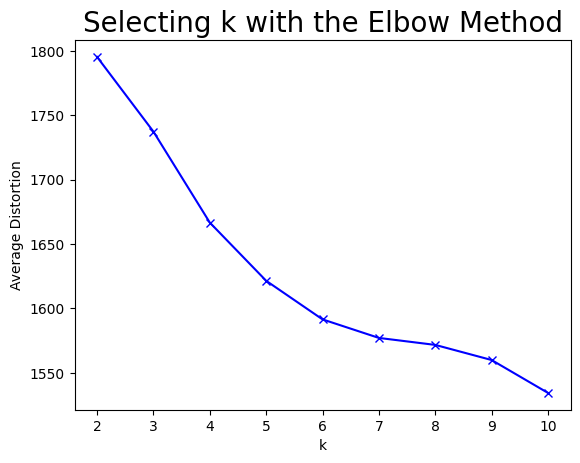

In [ ]:
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

In [ ]:
sil_score = []
cluster_list = range(2, 11)

for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)

    preds = clusterer.fit_predict((embedding_matrix))

    score = silhouette_score(embedding_matrix, preds)
    sil_score.append(score)

    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.046811509877443314)
For n_clusters = 3, the silhouette score is 0.04964283108711243)
For n_clusters = 4, the silhouette score is 0.06065066531300545)
For n_clusters = 5, the silhouette score is 0.06735046207904816)
For n_clusters = 6, the silhouette score is 0.06096599996089935)
For n_clusters = 7, the silhouette score is 0.05802200734615326)
For n_clusters = 8, the silhouette score is 0.05344569683074951)
For n_clusters = 9, the silhouette score is 0.05067500099539757)
For n_clusters = 10, the silhouette score is 0.04589764401316643)


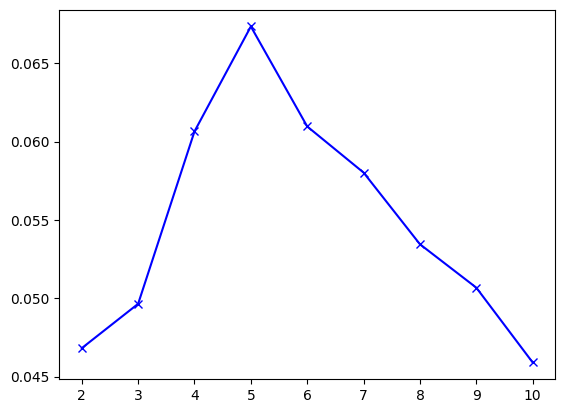

In [ ]:
plt.plot(cluster_list, sil_score, "bx-")
plt.show()

In [ ]:
n_categories = 5
kmeans = KMeans(n_clusters=n_categories, random_state=1).fit(embedding_matrix)

In [ ]:
centers = kmeans.cluster_centers_
centers

array([[-0.01785407,  0.00624583, -0.00339485, ..., -0.06009004,
        -0.03252158,  0.01114389],
       [ 0.00549149, -0.02162499,  0.01707268, ..., -0.03975475,
        -0.01703279,  0.01147507],
       [-0.01044312, -0.0430865 , -0.01626261, ..., -0.06730248,
        -0.0080532 ,  0.00465481],
       [-0.01394476, -0.03756041,  0.00739344, ..., -0.10312265,
        -0.01400104,  0.03134287],
       [-0.02824864, -0.03118991,  0.00693417, ..., -0.05258856,
         0.00538871,  0.03337956]], dtype=float32)

In [ ]:
kmeans.labels_

array([1, 1, 1, ..., 3, 3, 3], dtype=int32)

In [ ]:
clustered_data = data.copy()
clustered_data['Category'] = kmeans.labels_
clustered_data.head()

,Text,Category
0,"Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n \n Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.\n \n - Increase in the stamp duty threshold from Â£60,000 \n - A freeze on petrol duty \n - An extension of tax credit scheme for poorer families \n - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to half a million properties, in England and Wales alone, selling for less than Â£60,000. Since then, average UK property prices have more than doubled while the starting threshold for stamp duty has not increased. Tax credits As a result, the number of properties incurring stamp duty has rocketed as has the government's tax take. The Liberal Democrats unveiled their own proposals to raise the stamp duty threshold to Â£150,000 in February.\n \n The Tories are also thought likely to propose increased thresholds, with shadow chancellor Oliver Letwin branding stamp duty a ""classic Labour stealth tax"". The Tories say whatever the chancellor gives away will be clawed back in higher taxes if Labour is returned to power. Shadow Treasury chief secretary George Osborne said: ""Everyone who looks at the British economy at the moment says there has been a sharp deterioration in the public finances, that there is a black hole,"" he said. ""If Labour is elected there will be a very substantial tax increase in the Budget after the election, of the order of around Â£10bn.""\n \n But Mr Brown's former advisor Ed Balls, now a parliamentary hopeful, said an examination of Tory plans for the economy showed there would be a Â£35bn difference in investment by the end of the next parliament between the two main parties. He added: ""I don't accept there is any need for any changes to the plans we have set out to meet our spending commitments.""\n \n For the Lib Dems David Laws said: ""The chancellor will no doubt tell us today how wonderfully the economy is doing,"" he said. ""But a lot of that is built on an increase in personal and consumer debt over the last few years - that makes the economy quite vulnerable potentially if interest rates ever do have to go up in a significant way."" SNP leader Alex Salmond said his party would introduce a Â£2,000 grant for first time buyers, reduce corporation tax and introduce a citizens pension free from means testing. Plaid Cymru's economics spokesman Adam Price said he wanted help to get people on the housing ladder and an increase in the minimum wage to Â£5.60 an hour.\n",1
1,"Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.\n \n A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland's six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee's decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderers, the 

In [ ]:
clustered_data.sample(5)

,Text,Category
2119,"Japanese growth grinds to a halt\n \n Growth in Japan evaporated in the three months to September, sparking renewed concern about an economy not long out of a decade-long trough.\n \n Output in the period grew just 0.1%, an annual rate of 0.3%. Exports - the usual engine of recovery - faltered, while domestic demand stayed subdued and corporate investment also fell short. The growth falls well short of expectations, but does mark a sixth straight quarter of expansion.\n \n The economy had stagnated throughout the 1990s, experiencing only brief spurts of expansion amid long periods in the doldrums. One result was deflation - prices falling rather than rising - which made Japanese shoppers cautious and kept them from spending.\n \n The effect was to leave the economy more dependent than ever on exports for its recent recovery. But high oil prices have knocked 0.2% off the growth rate, while the falling dollar means products shipped to the US are becoming relatively more expensive.\n \n The performance for the third quarter marks a sharp downturn from earlier in the year. The first quarter showed annual growth of 6.3%, with the second showing 1.1%, and economists had been predicting as much as 2% this time around. ""Exports slowed while capital spending became weaker,"" said Hiromichi Shirakawa, chief economist at UBS Securities in Tokyo. ""Personal consumption looks good, but it was mainly due to temporary factors such as the Olympics. ""The amber light is flashing."" The government may now find it more difficult to raise taxes, a policy it will have to implement when the economy picks up to help deal with Japan's massive public debt.\n",3
1990,"Reliance unit loses Anil Ambani\n \n Anil Ambani, the younger of the two brothers in charge of India's largest private company, has resigned from running its petrochemicals subsidiary.\n \n The move is likely to be seen as the latest twist in a feud between Mr Ambani and his brother Mukesh. Anil, 45, has stepped down as director and vice-chairman of Indian Petrochemicals Corporation (IPC). The company was not available for comment. IPC is 46%-owned by Reliance Industries which in turn is run by Mukesh. Mukesh has spoken of ownership issues between the two brothers, who took over control of the Reliance empire following the death of their father in July, 2002.\n \n Reliance's operations have massive reach, covering textiles, telecommunications, petrochemicals, petroleum refining and marketing, as well as oil and gas exploration, insurance and financial services. The brothers' spat has hogged headlines in India during recent weeks, despite a denial from the family that there was anything wrong. Speculation has been rife about what has triggered the stand-off, with some observers blaming Anil's political ambitions, others the heavy investment by Mukesh and Reliance in a mobile phone venture. Shares of IPC dipped on the news in Mumbai, but recovered to trade almost 6% higher. Reliance shares added 1.7%, while Reliance Energy, headed by Anil, jumped 7%.\n",3
963,"Hitachi unveils 'fastest robot'\n \n Japanese electronics firm Hitachi has unveiled its first humanoid robot, called Emiew, to challenge Honda's Asimo and Sony's Qrio robots.\n \n Hitachi said the 1.3m (4.2ft) Emiew was the world's quickest-moving robot yet. Two wheel-based Emiews, Pal and Chum, introduced themselves to reporters at a press conference in Japan. The robots will be guests at the World Expo later this month. Sony and Honda have both built sophisticated robots to show off developments in electronics. Explaining why Hitachi's Emiew used wheels instead of feet, Toshihiko Horiuchi, from Hitachi's Mechanical Engineering Research Laboratory, said: ""We aimed to create a robot that could live and co-exist with people."" ""We want to make the robots useful for people ... If the robots moved slower than people, users would be frustrated."" Emiew - Excellent Mobility and Interactive Existence as Workmate - ca

In [ ]:
for i in range(5):
    print("CLUSTER",i)
    print(clustered_data.loc[clustered_data.Category == i, 'Text'].sample(5, random_state=1).values)
    print("*****************************************************************")
    print("\n")

CLUSTER 0
["O'Sullivan keeps his powder dry\n \n When you are gunning for glory and ultimate success keeping the gunpowder dry is essential.\n \n Ireland coach Eddie O'Sullivan appears to have done that quite successfully in the run-up to this season's Six Nations Championship. He decreed after the 2003 World Cup that players should have a decent conditioning period during the year. That became a reality at the end of last summer with a 10-week period at the start of the this season. It may have annoyed his Scottish, and in particularly Welsh, cousins who huffed and puffed at the disrespect apparently shown to the Celtic League. We will say nothing of Mike Ruddock ''poaching'' eight of the Dragons side that faced Leinster on Sunday. But, like O'Sullivan, he was well within his rights, particularly when you are talking about the national side and pride that goes along with it. The IRFU has thrown their weight behind O'Sullivan, who must be glad that in the main, there is centrally-contr

In [ ]:
category_dict = {
    0: 'Sports',
    1: 'Politics',
    2: 'Entertainment',
    3: 'Business',
    4: 'Technology'
}
clustered_data['Category'] = clustered_data['Category'].map(category_dict)

clustered_data.head()

,Text,Category
0,"Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n \n Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.\n \n - Increase in the stamp duty threshold from Â£60,000 \n - A freeze on petrol duty \n - An extension of tax credit scheme for poorer families \n - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to half a million properties, in England and Wales alone, selling for less than Â£60,000. Since then, average UK property prices have more than doubled while the starting threshold for stamp duty has not increased. Tax credits As a result, the number of properties incurring stamp duty has rocketed as has the government's tax take. The Liberal Democrats unveiled their own proposals to raise the stamp duty threshold to Â£150,000 in February.\n \n The Tories are also thought likely to propose increased thresholds, with shadow chancellor Oliver Letwin branding stamp duty a ""classic Labour stealth tax"". The Tories say whatever the chancellor gives away will be clawed back in higher taxes if Labour is returned to power. Shadow Treasury chief secretary George Osborne said: ""Everyone who looks at the British economy at the moment says there has been a sharp deterioration in the public finances, that there is a black hole,"" he said. ""If Labour is elected there will be a very substantial tax increase in the Budget after the election, of the order of around Â£10bn.""\n \n But Mr Brown's former advisor Ed Balls, now a parliamentary hopeful, said an examination of Tory plans for the economy showed there would be a Â£35bn difference in investment by the end of the next parliament between the two main parties. He added: ""I don't accept there is any need for any changes to the plans we have set out to meet our spending commitments.""\n \n For the Lib Dems David Laws said: ""The chancellor will no doubt tell us today how wonderfully the economy is doing,"" he said. ""But a lot of that is built on an increase in personal and consumer debt over the last few years - that makes the economy quite vulnerable potentially if interest rates ever do have to go up in a significant way."" SNP leader Alex Salmond said his party would introduce a Â£2,000 grant for first time buyers, reduce corporation tax and introduce a citizens pension free from means testing. Plaid Cymru's economics spokesman Adam Price said he wanted help to get people on the housing ladder and an increase in the minimum wage to Â£5.60 an hour.\n",Politics
1,"Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.\n \n A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland's six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee's decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderer

In [ ]:
from google.colab import files
uploaded = files.upload()


labels=pd.read_csv('/content/news_article_labels.csv')

Saving news_article_labels.csv to news_article_labels (1).csv


In [ ]:
labels.shape

(2127, 1)

In [ ]:
labels['Label'].unique()

array(['Politics', 'Sports', 'Technology', 'Entertainment', 'Business'],
      dtype=object)

In [ ]:
labels['Label'].value_counts(normalize=True)

,proportion
Label,
Sports,0.237424
Business,0.236483
Politics,0.189469
Entertainment,0.173484
Technology,0.163141


In [ ]:
clustered_data['Actual Category'] = labels['Label'].values

In [ ]:
print(classification_report(clustered_data['Actual Category'], clustered_data['Category']))

               precision    recall  f1-score   support

     Business       0.96      0.93      0.95       503
Entertainment       0.96      0.95      0.95       369
     Politics       0.96      0.95      0.95       403
       Sports       0.98      0.99      0.99       505
   Technology       0.91      0.97      0.93       347

     accuracy                           0.96      2127
    macro avg       0.95      0.96      0.96      2127
 weighted avg       0.96      0.96      0.96      2127



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:
cm= confusion_matrix(clustered_data['Actual Category'], clustered_data['Category'],labels= clustered_data['Actual Category'].unique() )
cm

array([[384,   3,   4,   1,  11],
       [  1, 500,   0,   4,   0],
       [  0,   3, 335,   7,   2],
       [  3,   0,  13, 349,   4],
       [ 14,   2,  18,   1, 468]])

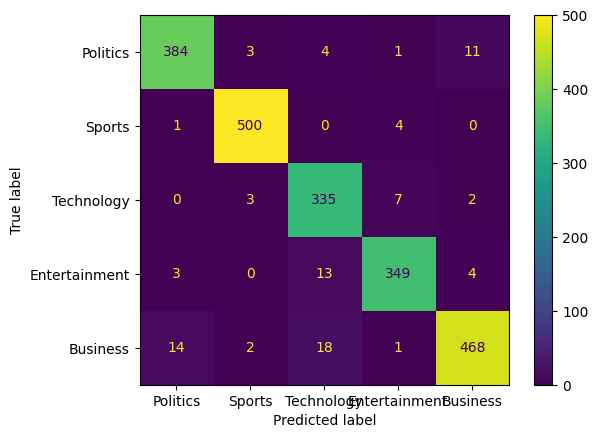

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clustered_data['Actual Category'].unique())
disp.plot();

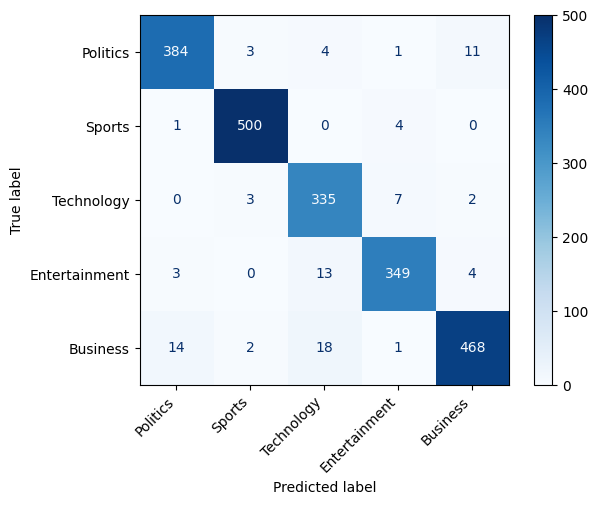

In [ ]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=clustered_data['Actual Category'].unique()
)
ax = disp.plot(cmap="Blues").ax_

# Rotate xtick labels by 45°
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

In [ ]:
incorrect_category_data = clustered_data[clustered_data['Actual Category'] != clustered_data['Category']].copy()
incorrect_category_data.shape

(91, 3)

In [ ]:
incorrect_category_data.head()

,Text,Category,Actual Category
24,"'Hitler' row over Welsh arts cash\n \n An artist critical of Welsh arts funding being brought under assembly government control has denied comparing the idea with dictatorships in Russia and Germany.\n \n Shani Rhys James is worried that the Arts Council of Wales may be taken over by the Welsh Assembly Government. Culture Minister Alun Pugh said it would be ""crass and ignorant"" to liken a quango review to Hitler's Germany. But Ms James emphasised she had actually said artists needed freedom. The future of the Arts Council of Wales has been in question since it was announced that most Welsh quangos would eventually be abolished.\n \n It was announced last July that three Welsh quangos, education and training body Elwa, the Wales Tourist Board and the Welsh Development Agency, would be brought under assembly government control. The Arts Council of Wales may be among the next to come under the assembly government's umbrella. But Ms James, who won the Â£30,000 Jerwood painting prize in 2003, said arts funding should be separate from government. Ms James told BBC Radio Wales: ""It's quite dangerous when you involve politicians because it's not like the health service and it's not like the railways. ""Free expression is absolutely vital in a democratic society. You need distance, you do not need government interference because it could be taken the wrong way.""\n \n But she said reports that she had likened the assembly government to totalitarian regimes were inaccurate.\n \n She told Good Morning Wales: ""Just to put the record straight, that business in the paper where it said I likened the government to Bolshevik Russia or Hitler's Germany, the actual quote I gave was: 'It is vital to a civilised society that we allow artists to express themselves without government control'. ""As we know from past European history, i.e. Russia and Germany in the early 20th Century, artists will go underground or leave the country or rather than compromise their expression'. ""Artists need a free voice to express themselves - they reflect a truth through their own art forms.'"" She said the assembly government was not best placed to run the arts in Wales.\n \n She added: ""It would be a momentous change and devastating to the arts. It would set the arts scene back 60 years, because I really don't think the government has the expertise. ""If you have the National Assembly taking control, I fear you are going to be going back to the dragons and leeks and the choirs.\n \n ""Wales has moved on. It is international now. It is not set back in How Green Was My Valley?"" Responding to Ms James' criticisms, Mr Pugh said: ""The structure of unelected quangos is under review and we have made it clear that further announcements are due shortly. ""Comparing the Welsh Assembly Government to Hitler's Germany is a crass and ignorant response to a real issue about democratic accountability."" Ms James, whose father was Welsh, was born in Melbourne where her parents worked in the theatre. She moved to Powys nearly 20 years ago where she works from her studio near Llangadfan. She has won a number of arts prizes including the Wales Open in 1989 and the Mostyn Open in 1991.\n",Entertainment,Politics
34,"Final hunts held as ban looms\n \n Hunts in England and Wales have begun on the last day that hunting with dogs is legal, with more due out later.\n \n Thousands of supporters are expected to turn out at more than 250 meets, many of which have altered their normal schedules to be out on a Thursday. The ban on hunting with dogs comes into effect from 0001 GMT on Friday. The Countryside Alliance had its latest legal bid to block the ban thwarted on Wednesday when the Appeal Court ruled the Hunting Act was lawful.\n \n But the group says hunting will continue in some form after the ban comes in, with hunts expected to test the new law to its limits. Others are expected to defy the ban by continuing to hunt illegally.\n \n Anti-hunt or

In [ ]:
embedding_matrix[24].reshape(1,-1)

array([[-3.89091857e-02,  3.27571668e-02,  1.84364337e-03,
        -5.83081087e-03,  6.01676032e-02,  3.99839170e-02,
         8.35593268e-02, -1.18345410e-01, -7.76456296e-02,
         4.64428216e-02, -2.95266137e-02, -5.02616912e-02,
         3.04022189e-02,  5.74795790e-02,  3.51721421e-02,
         7.98467249e-02, -3.60404365e-02, -7.27961063e-02,
        -4.79112789e-02,  2.51296367e-02,  5.57574034e-02,
         4.45612445e-02,  5.79392575e-02, -5.19735273e-03,
         6.96285740e-02, -6.41645044e-02, -1.78565383e-02,
         7.70377554e-03,  3.61743011e-02, -4.64322977e-03,
        -2.12844107e-02,  2.84408238e-02, -3.08641829e-02,
        -3.74556854e-02,  1.10003576e-01,  9.07790586e-02,
         5.40992953e-02, -1.71863735e-02, -6.01414219e-02,
        -3.79346758e-02, -1.19600765e-01,  9.33201704e-03,
        -8.53837878e-02, -4.68648709e-02,  2.57740617e-02,
         6.91596372e-03,  2.29996890e-02,  1.78320911e-02,
        -1.18079752e-01, -3.21984291e-02, -4.43797326e-0

In [ ]:
kmeans.cluster_centers_[[2]]

array([[-1.04431231e-02, -4.30864953e-02, -1.62626076e-02,
        -2.45876871e-02,  1.68980416e-02,  4.69358377e-02,
         4.19716910e-02,  8.88395682e-03,  1.32638002e-02,
        -1.04076127e-02, -2.22940147e-02, -1.37507115e-02,
         1.97701622e-02,  1.27869993e-02,  2.73735635e-03,
         7.39200367e-03,  4.07768860e-02, -2.11774260e-02,
        -1.97053086e-02,  6.95258379e-04, -2.27751443e-03,
        -3.76571622e-03,  5.05973445e-03, -4.74088266e-03,
        -8.69745016e-03, -2.58635525e-02, -2.06833296e-02,
        -4.78407554e-03, -3.27619240e-02, -3.24198417e-03,
         1.13380505e-02,  2.14789733e-02, -3.46701592e-02,
        -1.39540192e-02, -1.19951498e-02,  7.28388689e-03,
        -3.83113883e-03,  6.35841209e-03, -4.27266955e-02,
        -1.10604325e-02,  7.16871535e-03, -1.61167271e-02,
        -2.78127827e-02, -1.22194989e-02,  2.17279550e-02,
        -4.04962152e-02,  1.37342457e-02, -2.24780347e-02,
        -8.48784018e-03,  1.32654458e-02, -2.65153553e-0

In [ ]:
idx = 24

print('Distance from Actual Category')
print(cdist(embedding_matrix[idx].reshape(1,-1), kmeans.cluster_centers_[[2]], "euclidean")[0,0])

print('Distance from Predicted Category')
print(cdist(embedding_matrix[idx].reshape(1,-1), kmeans.cluster_centers_[[3]], "euclidean")[0,0])

Distance from Actual Category
0.9545187652210279
Distance from Predicted Category
1.0357046825280756


In [ ]:
idx = 45

print('Distance from Actual Category')
print(cdist(embedding_matrix[idx].reshape(1,-1), kmeans.cluster_centers_[[2]], "euclidean")[0,0])

print('Distance from Predicted Category')
print(cdist(embedding_matrix[idx].reshape(1,-1), kmeans.cluster_centers_[[4]], "euclidean")[0,0])

Distance from Actual Category
1.019115605584521
Distance from Predicted Category
1.0080196953598326
